<a href="https://colab.research.google.com/github/Guhan2348519/dl-lab-tasks/blob/main/2348519_dl_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:

from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [20]:
data=pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [21]:
data. head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
data.shape

(284807, 31)

In [23]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [25]:
count_nan_rows = data.isnull().any(axis=1).sum()

In [26]:
rows_with_nan = data[data.isnull().any(axis=1)]

In [27]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [28]:
print(data.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [30]:
#fraud_counts = data['is_fraud'].value#_counts()
#print("Number of positive samples (fr#audulent):", fraud_counts[1])
#print("Number of negative samples (no#n-fraudulent):", fraud_counts[0])

In [31]:
categorical_columns = []
for col in data.columns:
    if data[col].dtype == 'object' or len(data[col].unique()) < 10:
              categorical_columns.append(col)

# Print categorical columns
print("Categorical columns:")
for col in categorical_columns:
    print(col)

Categorical columns:
Class


In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in categorical_columns:
    if data[col].dtype == 'object':  # Check if the column type is object (categorical)
        data[col] = label_encoder.fit_transform(data[col])

In [33]:
from sklearn.preprocessing import StandardScaler
x=data.drop(columns=['Class','Time'])
y=data['Class']
sc=StandardScaler()
x=sc.fit_transform(x)

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense

In [37]:
model = Sequential([
    Dense(input_dim=29,units=15, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [38]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
model.fit(x_train, y_train, epochs=10,
          batch_size=1000,
          validation_split=0.2)

Epoch 1/10
183/183 [==============================] - 4s 7ms/step - loss: 0.3779 - accuracy: 0.8920 - val_loss: 0.1605 - val_accuracy: 0.9971
Epoch 2/10
183/183 [==============================] - 1s 4ms/step - loss: 0.0932 - accuracy: 0.9988 - val_loss: 0.0534 - val_accuracy: 0.9989
Epoch 3/10
183/183 [==============================] - 1s 4ms/step - loss: 0.0361 - accuracy: 0.9991 - val_loss: 0.0261 - val_accuracy: 0.9990
Epoch 4/10
183/183 [==============================] - 1s 4ms/step - loss: 0.0194 - accuracy: 0.9992 - val_loss: 0.0162 - val_accuracy: 0.9991
Epoch 5/10
183/183 [==============================] - 1s 4ms/step - loss: 0.0126 - accuracy: 0.9992 - val_loss: 0.0117 - val_accuracy: 0.9991
Epoch 6/10
183/183 [==============================] - 1s 4ms/step - loss: 0.0092 - accuracy: 0.9993 - val_loss: 0.0094 - val_accuracy: 0.9991
Epoch 7/10
183/183 [==============================] - 1s 4ms/step - loss: 0.0073 - accuracy: 0.9992 - val_loss: 0.0079 - val_accuracy: 0.9992
Epoch 

In [40]:
model1 = Sequential([
    Dense(input_dim=29,units=15, activation='tanh'),
    Dense(units=1, activation='sigmoid')
])

In [41]:
model1.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [45]:
model1.fit(x_train, y_train, epochs=10,
          batch_size=1000,
          validation_split=0.2)

Epoch 1/10
183/183 [==============================] - 2s 5ms/step - loss: 0.5069 - accuracy: 0.7649 - val_loss: 0.3168 - val_accuracy: 0.9408
Epoch 2/10
183/183 [==============================] - 1s 4ms/step - loss: 0.2322 - accuracy: 0.9773 - val_loss: 0.1712 - val_accuracy: 0.9931
Epoch 3/10
183/183 [==============================] - 1s 4ms/step - loss: 0.1364 - accuracy: 0.9959 - val_loss: 0.1099 - val_accuracy: 0.9971
Epoch 4/10
183/183 [==============================] - 1s 4ms/step - loss: 0.0921 - accuracy: 0.9978 - val_loss: 0.0784 - val_accuracy: 0.9977
Epoch 5/10
183/183 [==============================] - 1s 4ms/step - loss: 0.0679 - accuracy: 0.9981 - val_loss: 0.0599 - val_accuracy: 0.9979
Epoch 6/10
183/183 [==============================] - 1s 5ms/step - loss: 0.0530 - accuracy: 0.9982 - val_loss: 0.0480 - val_accuracy: 0.9979
Epoch 7/10
183/183 [==============================] - 1s 4ms/step - loss: 0.0431 - accuracy: 0.9983 - val_loss: 0.0398 - val_accuracy: 0.9980
Epoch 

In [50]:
import numpy as np
Y_PREC = np.where(1 , model.predict(x_test) > 0.5, 0)

1781/1781 [==============================] - 3s 2ms/step


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_PREC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.65      0.76        98

    accuracy                           1.00     56962
   macro avg       0.95      0.83      0.88     56962
weighted avg       1.00      1.00      1.00     56962



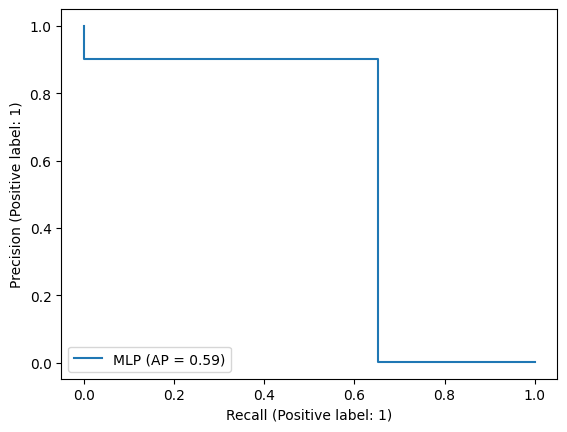

In [48]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_predictions(y_test, Y_PREC, name="MLP")

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Y_PREC)

array([[56857,     7],
       [   34,    64]])